## Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
credit_df = pd.read_csv("credit_risk_dataset.csv")
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Checking for null values

In [3]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
credit_df.shape

(32581, 12)

Lets handle null values. For interest rate, we can replace the null values with an average of all the interst rates because they are continuous data.

For the employment length, this column is inconsistent, as some data shows months of rent and some shows years. So, we can do analysis on this to find out its dependecy on the dependent variable, which is "Loan Status".

In [5]:
# replace null values in interst rate with mean
credit_df["loan_int_rate"] = credit_df["loan_int_rate"].fillna(value=credit_df["loan_int_rate"].mean())

In [6]:
credit_df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [7]:
# Lets drop emp_lenth right now
credit_df_new = credit_df.drop(columns=["person_emp_length"], inplace=False)
credit_df_new.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Exploratory Data Analysis with graphs

[]

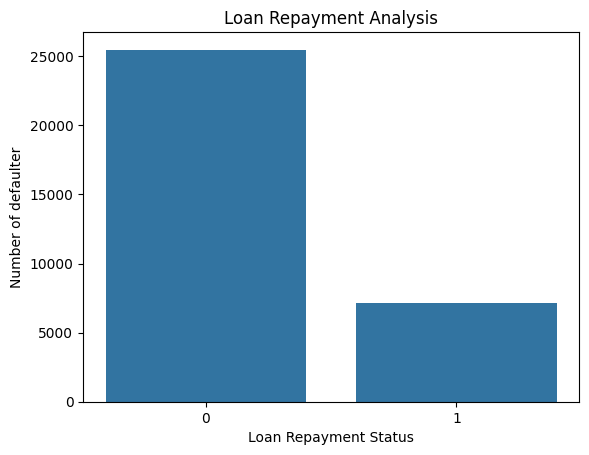

In [9]:
# get the number of defaulters in loan
sns.countplot(x=credit_df_new['loan_status'], data=credit_df_new)
plt.title("Loan Repayment Analysis")
plt.xlabel("Loan Repayment Status")
plt.ylabel("Number of defaulter")
plt.show()

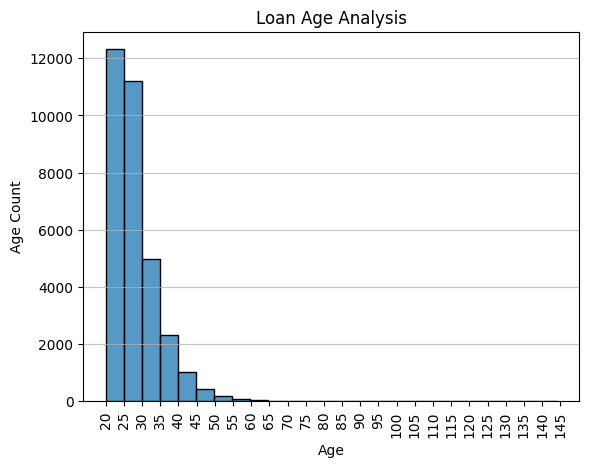

In [14]:
# what is the age where people take the most loan
sns.histplot(data=credit_df_new, x='person_age', binwidth=5, kde=False)
plt.title('Loan Age Analysis')
plt.xlabel('Age')
plt.ylabel('Age Count')

# set x-ticks at 5-year intervals based on data range
start = int(credit_df_new['person_age'].min()) // 5 * 5
end = int(credit_df_new['person_age'].max()) + 5
plt.xticks(range(start, end, 5), rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

Our data and analysis shows that people between the age of 20-30, takes the most amount of loan. 

Lets find out what type of loan does people between age of 20 and 30 take.

In [15]:
credit_df_20_30 = credit_df_new[(credit_df_new['person_age'] >= 20) & (credit_df_new['person_age'] <= 30)]
credit_df_20_30.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,14.27,1,0.55,Y,4


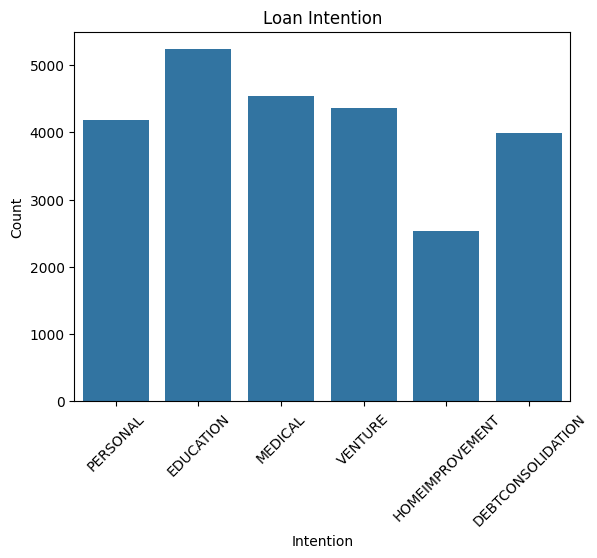

In [18]:
sns.countplot(data=credit_df_20_30, x="loan_intent")
plt.title('Loan Intention')
plt.xlabel('Intention')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph shows that, most of the people between the age of 20-30 take loan for Education, Medical, Personal, and even for paying another loan.

Lets see does having a family makes people take more loan. Education loan will be taken by people with a job and medical loan with someone with a family usually. We can find it out by what type of house they own. Usually a person with a family would either own a house or would have a mortage compared to a person living in a rented apartment.

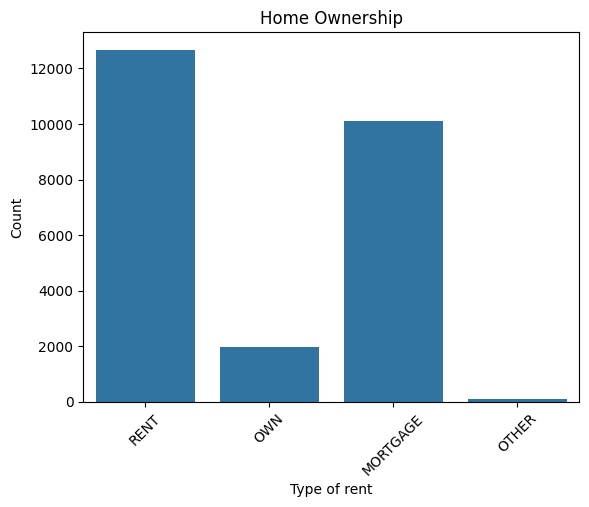

In [19]:
# what type of house do the people have
sns.countplot(data=credit_df_20_30, x='person_home_ownership')
plt.title('Home Ownership')
plt.xlabel('Type of rent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The above graph shows that most people between the age of 20-30 who takes a loan, are in a rented apartment or have a mortage, and very few of them own a house.

We can draw more insights from the graph like what age group does rent an apartment, what type of loans they require. 

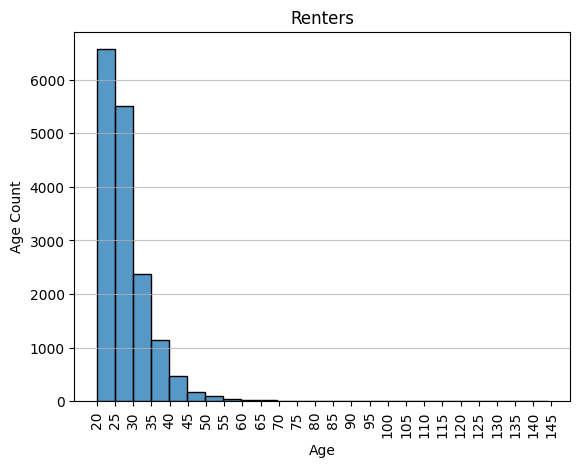

In [21]:
credit_df_rent = credit_df_new[credit_df_new['person_home_ownership'] == 'RENT']
sns.histplot(data=credit_df_rent, x='person_age',binwidth=5, kde=False)
plt.title("Renters")
plt.xlabel("Age")
plt.ylabel("Age Count")


# set x-ticks at 5-year intervals based on data range
start = int(credit_df_rent['person_age'].min()) // 5 * 5
end = int(credit_df_rent['person_age'].max()) + 5
plt.xticks(range(start, end, 5), rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

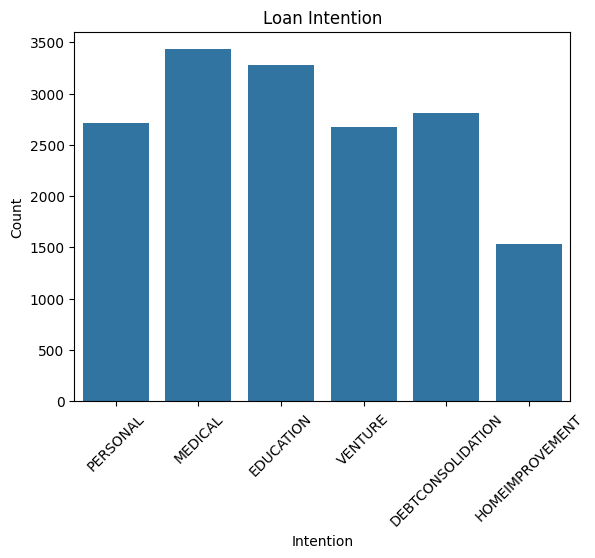

In [22]:
sns.countplot(data=credit_df_rent, x="loan_intent")
plt.title('Loan Intention')
plt.xlabel('Intention')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

So, renters take a lot of loan for medican and educational reasons.

We can do a similar analysis for mortagers as well.

## Standardising the numerican columns

This is important for our machine learning model because it ensures consistent quality, safety, and performance, leading to increased efficiency and reduced costs.

And standardising does not lose any data quality.

But lets first drop our dependent variable to avoid its standardisation.

In [24]:
!pip3 install scikit-learn

import numpy as np
from sklearn.preprocessing import StandardScaler

# drop loan_status
credit_df_new_drop = credit_df_new.drop(columns=['loan_status'])

# Select numeric columns to standardise (excludes non-numeric/categorical automatically)
num_cols = credit_df_new_drop.select_dtypes(include=[np.number]).columns.tolist()

# Create a copy and standardise numeric columns in-place on the copy
credit_df_new_scaled = credit_df_new_drop.copy()
scaler = StandardScaler()
credit_df_new_scaled[num_cols] = scaler.fit_transform(credit_df_new_drop[num_cols])

print('Standardised columns:', num_cols)
print('\nMeans (after scaling, ~0):')
print(np.round(credit_df_new_scaled[num_cols].mean(), 4))
print('\nStandard deviations (after scaling, ~1):')
print(np.round(credit_df_new_scaled[num_cols].std(), 4))

credit_df_new_scaled.head()


Standardised columns: ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

Means (after scaling, ~0):
person_age                    0.0
person_income                 0.0
loan_amnt                    -0.0
loan_int_rate                -0.0
loan_percent_income           0.0
cb_person_cred_hist_length   -0.0
dtype: float64

Standard deviations (after scaling, ~1):
person_age                    1.0
person_income                 1.0
loan_amnt                     1.0
loan_int_rate                 1.0
loan_percent_income           1.0
cb_person_cred_hist_length    1.0
dtype: float64
Standardised columns: ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

Means (after scaling, ~0):
person_age                    0.0
person_income                 0.0
loan_amnt                    -0.0
loan_int_rate                -0.0
loan_percent_income           0.0
cb_person_cred_hist_

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.903374,-0.114143,RENT,PERSONAL,D,4.019404,1.625251,3.931411,Y,-0.691554
1,-1.060904,-0.911147,OWN,EDUCATION,B,-1.358650,0.041636,-0.657458,N,-0.938167
2,-0.430783,-0.911147,MORTGAGE,MEDICAL,C,-0.646849,0.603041,3.744110,N,-0.691554
3,-0.745843,-0.009274,RENT,MEDICAL,C,4.019404,1.368887,3.369508,N,-0.938167
4,-0.588313,-0.188358,RENT,MEDICAL,C,4.019404,1.057357,3.556809,Y,-0.444942


In [26]:
credit_df_new_scaled.dtypes

person_age                    float64
person_income                 float64
person_home_ownership          object
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object

Our machine learning model will work better on numbers, so we need to encode the categorical columns into numbers.

In [29]:
from sklearn.preprocessing import LabelEncoder

cat_cols = credit_df_new_scaled.select_dtypes(exclude=[np.number]).columns.tolist()
credit_df_new_encoded = credit_df_new_scaled.copy()

for col in cat_cols:
    le = LabelEncoder()
    credit_df_new_encoded[col] = le.fit_transform(credit_df_new_encoded[col])


credit_df_new_encoded.head()


,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.903374,-0.114143,3,4,3,4.019404,1.625251,3.931411,1,-0.691554
1,-1.060904,-0.911147,2,1,1,-1.358650,0.041636,-0.657458,0,-0.938167
2,-0.430783,-0.911147,0,3,2,-0.646849,0.603041,3.744110,0,-0.691554
3,-0.745843,-0.009274,3,3,2,4.019404,1.368887,3.369508,0,-0.938167
4,-0.588313,-0.188358,3,3,2,4.019404,1.057357,3.556809,1,-0.444942


Now that we have pre-processed our data, we can proceed to developing our machine learning model.

## Machine Learning Models

In [30]:
from sklearn.model_selection import train_test_split

X = credit_df_new_encoded
y = credit_df_new['loan_status']

print(X.shape, y.shape)

(32581, 10) (32581,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In train_test_split , the stratify parameter ensures that the training and testing sets have the same proportion of classes (or labels) as the original dataset. This is particularly useful when dealing with imbalanced datasets, where some classes are underrepresented.

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X=X_train, y=y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [33]:
y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8445603805431947

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5095
           1       0.72      0.46      0.57      1422

    accuracy                           0.84      6517
   macro avg       0.79      0.71      0.74      6517
weighted avg       0.83      0.84      0.83      6517



Lets also try other models like Decision Tree and XGBoost

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)

In [38]:
decision_tree.fit(X=X_train, y=y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
y_pred_dt = decision_tree.predict(X=X_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8752493478594445

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5095
           1       0.71      0.73      0.72      1422

    accuracy                           0.88      6517
   macro avg       0.82      0.82      0.82      6517
weighted avg       0.88      0.88      0.88      6517



We can use GridSearchCV to analyse which parameters will give us the best results

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [47]:
grid.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [48]:
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.9146332394999866


In [49]:
y_pred_grid_dt = grid.predict(X=X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_grid_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid_dt))

Accuracy: 0.9142243363510818

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5095
           1       0.90      0.68      0.78      1422

    accuracy                           0.91      6517
   macro avg       0.91      0.83      0.86      6517
weighted avg       0.91      0.91      0.91      6517



We can now go a step further by saving and deploying the model.

## Saving the model

In [52]:
import pickle

best_model = grid.best_estimator_ 

with open('credit_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Testing the model by loading it and infering

In [54]:
with open('credit_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction
sample_input = X_test.iloc[:1]
pred = loaded_model.predict(sample_input)
print(pred, y_pred[0])


[0] 0


This model can now be used with a FastAPI or could be containerised and deployed on cloud